In [1]:
import re


In [4]:
with open('listeJournals.txt', 'r') as fp:
    data = fp.read()

In [6]:
print(data[:100])

['ACM Trans. Math. Software', 'acmms', 1984]
['ACM Trans. Math. Software', 'acmms', 1985]
['ACM Tran


In [11]:
row_p = re.compile("\[(.*?), (.*?), (\d+)")

In [13]:
long, short, dates = zip(* row_p.findall(data) )

In [36]:
stuff = {x : [] for x in set(short)}

In [37]:
for a, b in zip(short, dates):
    stuff[a].append(int(b))

In [38]:
for a in stuff.keys():
    stuff[a] = sorted(stuff[a])

In [42]:
for a in sorted(stuff.keys()):
    continue
    print( a, stuff[a][0], stuff[a][-1])
    

In [67]:
import pandas as pd
import pickle

from datetime import timedelta, date
import time


start_day= date(2010, 1, 11)

In [137]:
fn = 'arx_math_2010-06-18_2010-12-31.pkl'
fn = 'arx_math_2011-01-01_2011-12-31.pkl'
with open( fn,'rb') as fp:
    output = pickle.load(fp)

Note how the not operator is ~ and non **not**

In [138]:
df = pd.DataFrame(output)
yy = '2011'
dfc = df[ df['created'].str.contains(yy) ]
dfu = df[ ~df['created'].str.contains(yy) ]

In [56]:
math_cat = [ x for x in set( ' '.join(list(df['categories'])).split(' ') ) if 'math' in x]

In [153]:
len(dfc)

11843

In [149]:
def date2doy(x, yy=2010):
    if x == '' : return None
    yy,mm,dd = [int(y) for y in x.split('-')]
    return date(yy,mm,dd) - date(yy, 1, 1)

C = [date2doy(x, yy=int(yy)) for x in dfc['created'] ]
U = [date2doy(x, yy=int(yy)) for x in dfu['updated'] ]
U = [x for x in U if x]

In [150]:
doyc = [x.days for x in C ]
doyu = [x.days for x in U ]

In [154]:
from collections import Counter
freqs = Counter(doyc)
freqs.most_common(10)

[(51, 74),
 (44, 67),
 (128, 62),
 (130, 59),
 (38, 58),
 (59, 58),
 (58, 57),
 (86, 57),
 (117, 57),
 (60, 55)]

In [82]:
import matplotlib.pyplot as plt
import numpy as np 

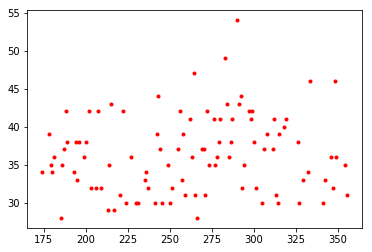

In [93]:
xs,ys = zip(*freqs.most_common(100))
plt.plot(xs, ys,'r.')

Text(0.5,1,'Arxiv Submissions 2010')

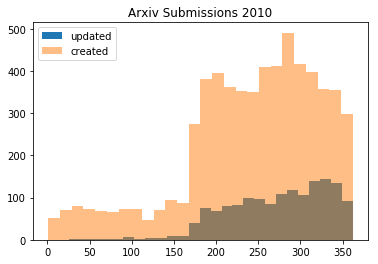

In [123]:
plt.hist(doyu,bins=26, alpha=1., label='updated')
plt.hist(doy,bins=26, alpha=0.5, label='created')
plt.legend(loc='upper left')
plt.title('Arxiv Submissions 2010')


Text(0.5,1,'Arxiv Submissions 2011')

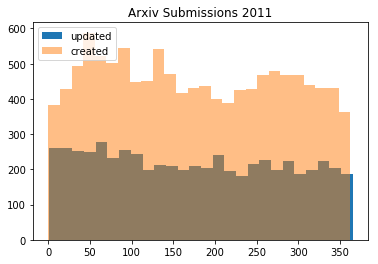

In [155]:
plt.hist(doyu,bins=26, alpha=1., label='updated')
plt.hist(doyc,bins=26, alpha=0.5, label='created')
plt.legend(loc='upper left')
plt.title('Arxiv Submissions ' + yy)